In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import librosa 
import librosa.display
import seaborn as sns

import tensorflow as tf
import tensorflow_io as tfio


In [5]:
# Considerons comme sons normaux les données sons du fichier train/valve => label = 0
# Et comme sons anormaux le reste du dataset d'entrainnement (train/fan; train/pump; train/slider) => lablel = 1

Ouverture des différents fichiers csv

In [4]:
df_fan_train = pd.read_csv('fichier_fan_train.csv', index_col=0)
display(df_fan_train.head())
print(df_fan_train.shape)
print(df_fan_train['label'].value_counts())

,audio_file,machine_type,machine_id,machine_class,label
0,C:/Users/romua/Documents/Formation_data_scient...,fan,0,normal,1
1,C:/Users/romua/Documents/Formation_data_scient...,fan,0,normal,1
2,C:/Users/romua/Documents/Formation_data_scient...,fan,0,normal,1
3,C:/Users/romua/Documents/Formation_data_scient...,fan,0,normal,1
4,C:/Users/romua/Documents/Formation_data_scient...,fan,0,normal,1


(3675, 5)
1    3675
Name: label, dtype: int64


In [6]:
df_pump_train = pd.read_csv('fichier_pump_train.csv', index_col=0)
display(df_pump_train.head())
print(df_pump_train.shape)
print(df_pump_train['label'].value_counts())

,audio_file,machine_type,machine_id,machine_class,label
0,C:/Users/romua/Documents/Formation_data_scient...,pump,0,normal,0
1,C:/Users/romua/Documents/Formation_data_scient...,pump,0,normal,0
2,C:/Users/romua/Documents/Formation_data_scient...,pump,0,normal,0
3,C:/Users/romua/Documents/Formation_data_scient...,pump,0,normal,0
4,C:/Users/romua/Documents/Formation_data_scient...,pump,0,normal,0


(3328, 5)
0    3328
Name: label, dtype: int64


In [7]:
df_pump_train['label'] = df_pump_train['label'].replace( {0 : 1})  
display(df_pump_train.head())
print(df_pump_train['label'].value_counts())

,audio_file,machine_type,machine_id,machine_class,label
0,C:/Users/romua/Documents/Formation_data_scient...,pump,0,normal,1
1,C:/Users/romua/Documents/Formation_data_scient...,pump,0,normal,1
2,C:/Users/romua/Documents/Formation_data_scient...,pump,0,normal,1
3,C:/Users/romua/Documents/Formation_data_scient...,pump,0,normal,1
4,C:/Users/romua/Documents/Formation_data_scient...,pump,0,normal,1


1    3328
Name: label, dtype: int64


In [8]:
df_valve_train = pd.read_csv('fichier_valve_train.csv', index_col=0)
display(df_valve_train.head())
print(df_valve_train.shape)

,audio_file,machine_type,machine_id,machine_class,label
0,C:/Users/romua/Documents/Formation_data_scient...,valve,0,normal,1
1,C:/Users/romua/Documents/Formation_data_scient...,valve,0,normal,1
2,C:/Users/romua/Documents/Formation_data_scient...,valve,0,normal,1
3,C:/Users/romua/Documents/Formation_data_scient...,valve,0,normal,1
4,C:/Users/romua/Documents/Formation_data_scient...,valve,0,normal,1


(3291, 5)


In [9]:
df_valve_train['label'] = df_valve_train['machine_class'].replace({'normal':0, 'anormal':1})

In [10]:
display(df_valve_train.head())
print(df_valve_train['label'].value_counts())

,audio_file,machine_type,machine_id,machine_class,label
0,C:/Users/romua/Documents/Formation_data_scient...,valve,0,normal,0
1,C:/Users/romua/Documents/Formation_data_scient...,valve,0,normal,0
2,C:/Users/romua/Documents/Formation_data_scient...,valve,0,normal,0
3,C:/Users/romua/Documents/Formation_data_scient...,valve,0,normal,0
4,C:/Users/romua/Documents/Formation_data_scient...,valve,0,normal,0


0    3291
Name: label, dtype: int64


In [12]:
df_slider_train = pd.read_csv('fichier_slider_train.csv', index_col=0)
display(df_slider_train.head())
print(df_slider_train.shape)
print(df_slider_train['label'].value_counts())

,audio_file,machine_type,machine_id,machine_class,label
0,C:/Users/romua/Documents/Formation_data_scient...,slider,0,normal,1
1,C:/Users/romua/Documents/Formation_data_scient...,slider,0,normal,1
2,C:/Users/romua/Documents/Formation_data_scient...,slider,0,normal,1
3,C:/Users/romua/Documents/Formation_data_scient...,slider,0,normal,1
4,C:/Users/romua/Documents/Formation_data_scient...,slider,0,normal,1


(2804, 5)
1    2804
Name: label, dtype: int64


In [13]:
# Création du fichier d'entrainnement contenants les données sons des machines fan, pump, slider et valve
df = pd.concat((df_fan_train, df_slider_train, df_pump_train, df_valve_train), axis=0)

In [14]:
df = df.to_csv('fichier_entrainnement_valve_normal.csv')

In [15]:
df = pd.read_csv('fichier_entrainnement_valve_normal.csv', index_col=0)
df.head()

,audio_file,machine_type,machine_id,machine_class,label
0,C:/Users/romua/Documents/Formation_data_scient...,fan,0,normal,1
1,C:/Users/romua/Documents/Formation_data_scient...,fan,0,normal,1
2,C:/Users/romua/Documents/Formation_data_scient...,fan,0,normal,1
3,C:/Users/romua/Documents/Formation_data_scient...,fan,0,normal,1
4,C:/Users/romua/Documents/Formation_data_scient...,fan,0,normal,1


In [17]:
df.label.value_counts()

1    9807
0    3291
Name: label, dtype: int64

In [16]:
df.label.value_counts(normalize=True)

1    0.74874
0    0.25126
Name: label, dtype: float64

In [18]:
# Ecouter le son émis par un fichier audio

from IPython.display import Audio
audio = tfio.audio.AudioIOTensor(df.iloc[0,0], dtype='int16')
 # convert to tensor
audio_tensor = audio.to_tensor()
# remove last dimension
audio_tensor = tf.squeeze(audio_tensor, axis=[-1])
Audio(audio_tensor.numpy(), rate=audio.rate.numpy())


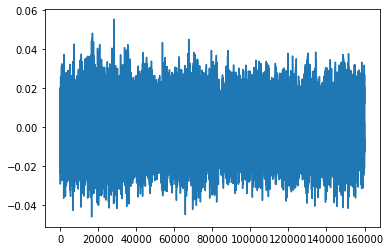

In [19]:
# Affichage du du clip audio sous forme graphique

 # convert audio tensor in float32
audio_tensor = tf.cast(audio_tensor, tf.float32) / 32768.0

plt.figure()
plt.plot(audio_tensor.numpy())
plt.show()

In [20]:

def spectro_gram(filepath):
    # lecture du fichier audio
    audio = tfio.audio.AudioIOTensor(filepath, dtype='int16')
    
    #audio rate
    #audioSR = int(audio.rate.numpy())
    
    # convert to tensor
    audio_tensor = audio.to_tensor()
    
    # remove last dimension
    audio_tensor = tf.squeeze(audio_tensor, axis=[-1])
    
    # convert audio tensor in float32
    audio_tensor = tf.cast(audio_tensor, tf.float32) / 32768.0
    
    #frame_step = int(audioSR * 0.008)
    
    # Convert to spectrogram
    spectrogram = tfio.audio.spectrogram(audio_tensor, nfft=4096, window=4096, stride=512)

    # Convert to mel-spectrogram
    mel_spectrogram = tfio.audio.melscale(spectrogram, rate=16000, mels=128, fmin=0, fmax=8000)

    # Convert to db scale mel-spectrogram
    dbscale_mel_spectrogram = tfio.audio.dbscale(mel_spectrogram, top_db=80)
        
    # Freq masking
    #dbscale_mel_spectrogram = tfio.audio.freq_mask(dbscale_mel_spectrogram, param=10)
    
    # Time masking
    #dbscale_mel_spectrogram = tfio.audio.time_mask(dbscale_mel_spectrogram, param=10)
    
    # redimensionnement
    dbscale_mel_spectrogram = tf.reshape(dbscale_mel_spectrogram, (313, 128, 1))
    
    return dbscale_mel_spectrogram / 255

In [21]:
# Séparation du jeu de données en jeu d'entrainement et de validation

from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

X_train_path, X_eval_path, y_train, y_eval = train_test_split(df.audio_file, df.label, train_size=0.7, random_state=1234)

In [22]:
# Transformation des données audio dans X_eval_path en spéctrogramme
X_eval = []
for filepath in tqdm(X_eval_path):
    # Lecture du fichier
    spec = spectro_gram(filepath)

    X_eval.append([spec])
    
X_eval = tf.concat(X_eval, axis=0)


100%|██████████| 3930/3930 [08:06<00:00,  8.08it/s]


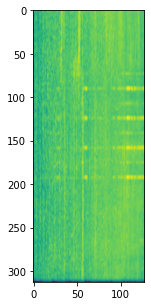

In [24]:
# Affichage d'un spéctrogramme de X_val
spec= X_eval[1000]
plt.figure(figsize=(20,5))
plt.imshow(spec)
plt.show()

In [25]:
# Transformation des labels en variables catégorielles
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, dtype='int')
y_eval = np_utils.to_categorical(y_eval, dtype='int')

In [26]:
y_train

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]])

In [27]:
# Définition d'un dataset 'dataset_train' de (X_train_path, y_train) à l'aide de la fonction from_tensor_slices
dataset_train = tf.data.Dataset.from_tensor_slices((X_train_path, y_train))

In [28]:
# Appliquons la fonction spectro_gram à chaque valeur de X_train_path à l'aide de la méthode map. 
# Pour que le chargement s'effectue en multi-tasking, précisons l'argument num_parallel_calls = -1
# Regroupeons les observations sous forme de batchs de taille 64

dataset_train = dataset_train.map(lambda x, y : [spectro_gram(x), y], num_parallel_calls = -1).shuffle(100).batch(64)


In [29]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import metrics

Utilisation de l'architecture Lenet dans lequel on garde la structure mais où les paramètres des filtres sont modifiés

In [30]:
# Architecture du modèle 
lenet = Sequential()

conv_1 = Conv2D(filters = 64,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (313, 128, 1),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

max_pool_1 = MaxPooling2D(pool_size = (2, 2))

conv_2 = Conv2D(filters = 32,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2 = MaxPooling2D(pool_size = (2, 2))

flatten = Flatten()

dropout = Dropout(rate = 0.2)

dense_1 = Dense(units = 128,
                activation = 'relu')

dense_2 = Dense(units = 2,
                activation = 'sigmoid')

lenet.add(conv_1)
lenet.add(max_pool_1)
lenet.add(conv_2)
lenet.add(max_pool_2)

lenet.add(dropout)
lenet.add(flatten)
lenet.add(dense_1)
lenet.add(dense_2)

# Compilation
lenet.compile(loss='binary_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation


In [31]:
lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 309, 124, 64)      1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 154, 62, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 152, 60, 32)       18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 76, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 76, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 72960)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               9

In [32]:
from tensorflow.keras import callbacks

In [33]:
# Définition du callback early_stopping afin de contrôle l'entrainement
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
   
    patience=3,
    
    mode='min',
  
    restore_best_weights=True,
)

In [34]:
history = lenet.fit(dataset_train, epochs=15, validation_data=(X_eval, y_eval), callbacks=[early_stopping])

Epoch 1/15
144/144 [==============================] - 360s 2s/step - loss: 0.4614 - accuracy: 0.7996 - val_loss: 0.2090 - val_accuracy: 0.9751
Epoch 2/15
144/144 [==============================] - 359s 2s/step - loss: 0.4053 - accuracy: 0.8435 - val_loss: 0.2062 - val_accuracy: 0.9845
Epoch 3/15
144/144 [==============================] - 364s 3s/step - loss: 0.3898 - accuracy: 0.8550 - val_loss: 0.1591 - val_accuracy: 0.9870
Epoch 4/15
144/144 [==============================] - 361s 3s/step - loss: 0.3868 - accuracy: 0.8533 - val_loss: 0.1887 - val_accuracy: 0.9952
Epoch 5/15
144/144 [==============================] - 359s 2s/step - loss: 0.3919 - accuracy: 0.8527 - val_loss: 0.1865 - val_accuracy: 0.9718
Epoch 6/15
144/144 [==============================] - 359s 2s/step - loss: 0.3839 - accuracy: 0.8561 - val_loss: 0.1680 - val_accuracy: 0.9949


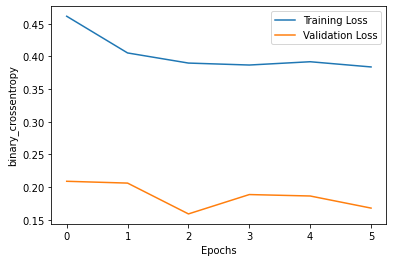

In [35]:
#plot the training history

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('binary_crossentropy')
plt.savefig('model_training_history')
plt.show()

In [38]:
# Chargement des fichiers audios du dossier fan/test dans un dataframe
import os
class File_charge:
    """
    La classe File_charge permet d'instancier un objet de type dataframe contenant les chemins d'accès des fichiers audio
    contenus dans chaque sous dossier du dataset
    
    Paramètres:
                path : Chemin d'accès au répetoire des fichiers audio
                expemple : path = "C:/Users/romua/Documents/Formation_data_scientist/ASD/dataset/fan/train/"    
    """
    def __init__(self, path):
        self.path = path 
        
    def load_file(self):
        """
        La fonction load_file retourne un dataframe constituer des chemins d'accès aux fichiers audio contenu 
        dans un sous dossier du dataset
        
        """
        
        dirs = os.listdir(self.path)

        df = list()
        for dir in dirs:
            #df.append((dir))
            df.append((self.path + dir))

        df = pd.DataFrame(df, columns = ['audio_file'])
        # df = df.reset_index()
        return  df

In [39]:
# Chargement du dataframe des chemins d'accès des audios contenus dans le dataset/valve/test
df = File_charge("C:/Users/romua/Documents/Formation_data_scientist/ASD/dataset/valve/test/")
df = df.load_file()

In [56]:
# Création d'un fichier csv comportant les chemins d'accès aux données audios du valve/test
df['machine_type'] = (df.iloc[:,0]).apply(lambda x: x.split('/')[7])
df['machine_id'] = ((df.iloc[:,0]).apply(lambda x: x.split('/')[-1]))
df['machine_id'] = (df['machine_id']).apply(lambda x: x.split('_')[2])
df['machine_class'] = (df.iloc[:,0]).apply(lambda x: x.split('/')[-1])
df['machine_class'] = (df['machine_class']).apply(lambda x: x.split('_')[0])
df['label'] = df['machine_class'].replace( {'normal': 0, 'anomaly': 1})  

df.to_csv('fichier_valve_test.csv')

In [57]:
df_valve_test = pd.read_csv('fichier_valve_test.csv', index_col=0)
df_valve_test.head()

,audio_file,machine_type,machine_id,machine_class,label
0,C:/Users/romua/Documents/Formation_data_scient...,valve,0,anomaly,1
1,C:/Users/romua/Documents/Formation_data_scient...,valve,0,anomaly,1
2,C:/Users/romua/Documents/Formation_data_scient...,valve,0,anomaly,1
3,C:/Users/romua/Documents/Formation_data_scient...,valve,0,anomaly,1
4,C:/Users/romua/Documents/Formation_data_scient...,valve,0,anomaly,1


In [43]:
df_valve_test['label'].value_counts()

1    479
0    400
Name: label, dtype: int64

In [44]:
X_test_path = df_valve_test['audio_file']
y_test = df_valve_test['label']

In [45]:
X_test_path.shape

(879,)

In [46]:
X_test = []
for filepath in tqdm(X_test_path):
    # Lecture du fichier
    spec = spectro_gram(filepath)

    X_test.append([spec])
    
X_test = tf.concat(X_test, axis=0)

100%|██████████| 879/879 [00:38<00:00, 22.60it/s]


In [47]:
y_pred = (lenet.predict(X_test).argmax(axis=1))

In [48]:
pd.crosstab(y_test, y_pred, rownames=['valeur réélle'], colnames=['valeur prédite'])

valeur prédite,0,1
valeur réélle,,
0,389,11
1,373,106


In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.97      0.67       400
           1       0.91      0.22      0.36       479

    accuracy                           0.56       879
   macro avg       0.71      0.60      0.51       879
weighted avg       0.73      0.56      0.50       879



In [50]:
y_test = np_utils.to_categorical(y_test, dtype='int')

In [51]:
y_score = lenet.predict(X_test)

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [53]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

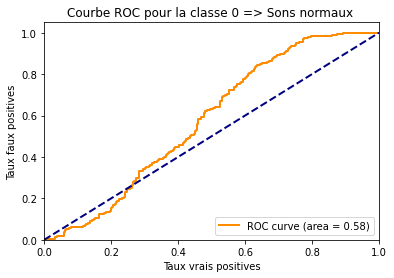

In [54]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux vrais positives')
plt.ylabel('Taux faux positives')
plt.title('Courbe ROC pour la classe 0 => Sons normaux ')
plt.legend(loc="lower right")
plt.show()

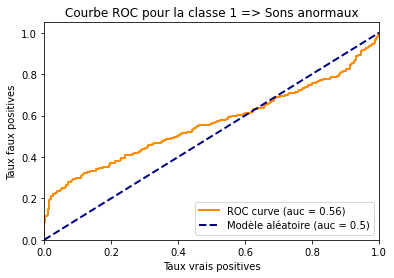

In [55]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (auc = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label = 'Modèle aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux vrais positives')
plt.ylabel('Taux faux positives')
plt.title('Courbe ROC pour la classe 1 => Sons anormaux')
plt.legend(loc="lower right")
plt.show()